In [6]:
import numpy as np
import random
from collections import Counter
import matplotlib.pyplot as plt


In [7]:
class turn():
    def __init__(self, rolls = [], hots = [], score = 0, verbose = False, doubles_completion = False):
        self.rolls = rolls
        self.hots = set(hots)
        self.score = score
        self.hots_payoff = {1: 1000, 2: 200, 3: 300, 4: 400, 5: 500, 6: 600}
        self.bust = False
        self.remove = []
        self.verbose = verbose
        self.doubles_completion = doubles_completion
  
    def __repr__(self):
        return "roll: %s, removed: %s, hots: %s, score: %d" %(self.rolls,
     self.remove, self.hots, self.score)  
    
    def reset_roll(self, hots = []):
        self.rolls = []
        self.hots = set(hots)

    def roll_em(self):
        if (not self.rolls):
            self.rolls = [0, 0, 0, 0, 0, 0]
        for i in range(len(self.rolls)):
            self.rolls[i] = random.randint(1, 6)
        self.rolls.sort()
    
    def special_rolls(self):
        if (self.rolls[0] == self.rolls[1] == self.rolls[2] and self.rolls[3] == self.rolls[4] == self.rolls[5]
            and not self.rolls[0] == self.rolls[3]):
            self.score += 2500

        elif (self.rolls[0] == self.rolls[1] and self.rolls[2] == self.rolls[3] 
              and self.rolls[4] == self.rolls[5] 
              and len(set([self.rolls[0], self.rolls[2], self.rolls[4]])) == 3):
            self.score += 750

        elif (self.rolls[0] == 1 and self.rolls[1] == 2 and self.rolls[2] == 3 
              and self.rolls[3] == 4 and self.rolls[4] == 5 and self.rolls[5] == 6):
            self.score += 1500
        
        else: return
            
        self.remove = self.rolls
        self.reset_roll()
    
    def take_hots(self):
        if (self.hots):
            self.remove += [x for x in self.rolls if x in self.hots]
            self.rolls[:] = [x for x in self.rolls if not x in self.hots]
            self.hots = set(self.remove)
            self.score += sum([self.hots_payoff[x] for x in self.remove])

        if (not self.rolls):
            return

        [hots] = Counter(self.rolls).most_common(1)
        
        if (hots[1] > 2):
            self.score += (np.count_nonzero(np.array(self.rolls) == hots[0]) - 2) * self.hots_payoff[hots[0]]
            self.hots.add(hots[0])
            self.remove += [x for x in self.rolls if x == hots[0]]
            self.rolls[:] = [x for x in self.rolls if not x == hots[0]]

    def take_doubles_completion(self):
        if (not self.rolls):
            return
        test_roll = [x for x in self.rolls if not x%4 == 1]
        if (not len(test_roll)%2 == 0): 
            return
        if ((len(test_roll) == 2 and test_roll[0] == test_roll[1])
            or (len(test_roll) == 4 and test_roll[0] == test_roll[1] 
            and test_roll[2] == test_roll[3])):
            self.remove += test_roll
            self.rolls[:] = [x for x in self.rolls if x%4 == 1]


    def take_iv(self):
        if (not self.rolls):
            return
        
        ones = np.count_nonzero(np.array(self.rolls) == 1)
        fives = np.count_nonzero(np.array(self.rolls) == 5)
        
        if (ones + fives == len(self.rolls)):
            self.remove += self.rolls
            self.score += 100*ones + 50*fives
            if (len(self.remove) > ones + fives):
                self.reset_roll(hots = self.hots)
            else:
                self.reset_roll()
        
        elif (not self.remove or len(self.rolls)<3):
            
            for i, a in enumerate(self.rolls):
                if (a == 1):
                    self.score += 100
                    self.remove.append(a)
                    self.rolls.pop(i)
                    if (len(self.rolls)>2):
                        break
                elif (a == 5):
                    self.score += 50
                    self.remove.append(a)
                    self.rolls.pop(i)
                    if (len(self.rolls)>2):
                        break
            if (not self.remove):
                if (self.verbose):
                    print("roll: %s, you Busted, your turn is over!" % (self.rolls))
                self.bust = True
            
    def take(self):
        self.remove = []
        self.rolls.sort()
        if (len(self.rolls) == 6):
            self.special_rolls()
        self.take_hots()
        if (self.doubles_completion):
            self.take_doubles_completion()
        self.take_iv()
        if (not self.bust and self.verbose):
            print(my_turn)

In [8]:
score = []
for i in range(10000):
    my_turn = turn(rolls = [1, 1, 5, 5, 3], score = 100, doubles_completion=True)
    my_turn.take()
    while not my_turn.bust:
        my_turn.roll_em()
        my_turn.take()
    score.append(my_turn.score)


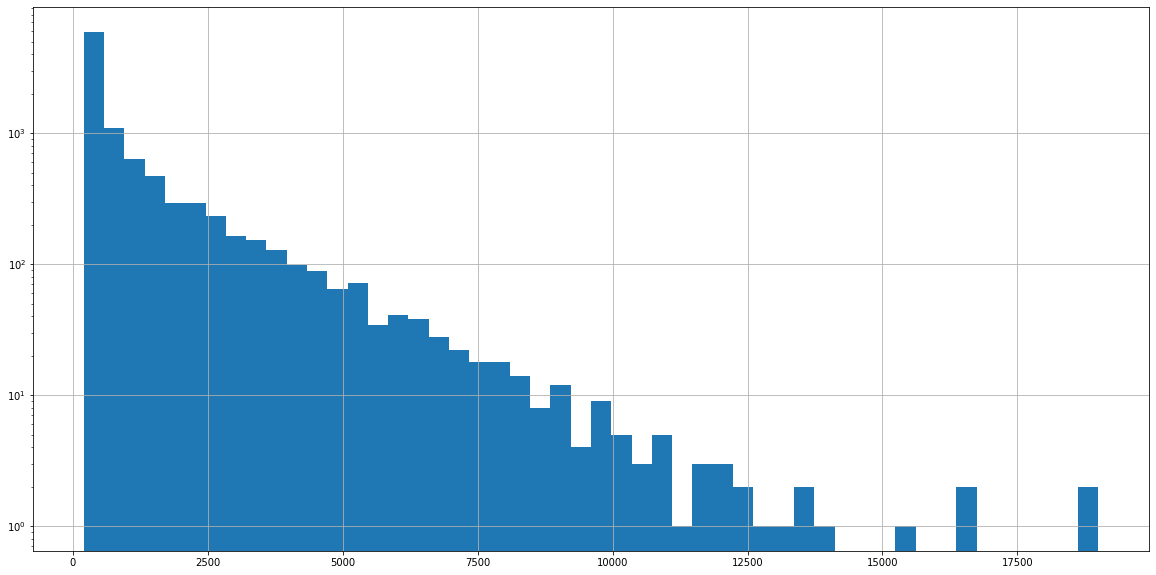

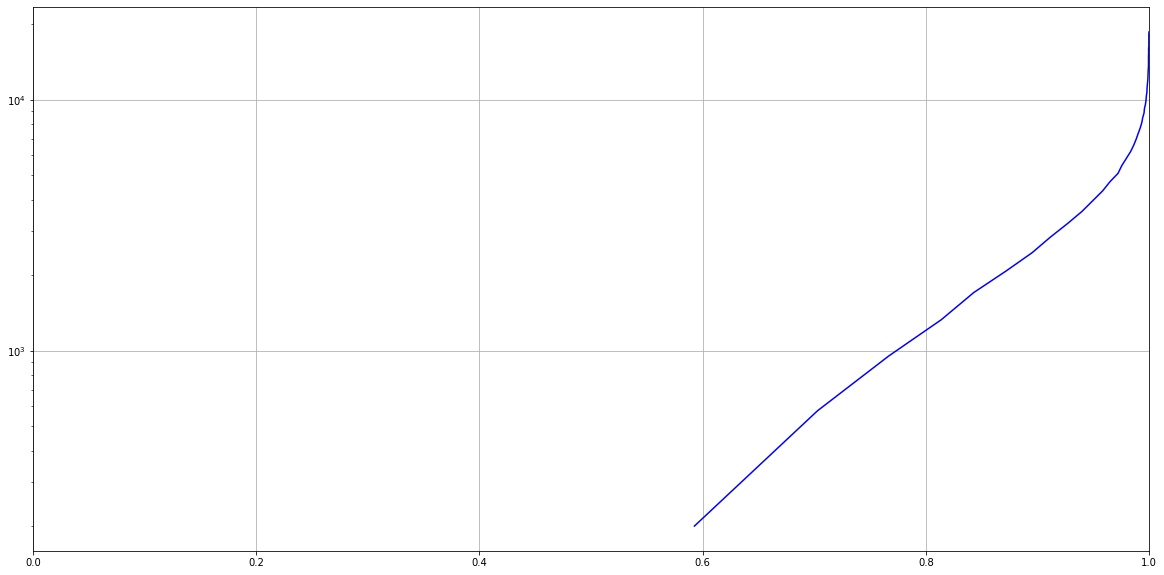

In [10]:

if ([1]):
    #plt.rcParams["figure.figsize"] = (20,10)
    plt.figure(figsize=(20, 10))
    n, bins, patches = plt.hist(score, 50)
    plt.yscale("log")
    plt.grid(True)
    plt.show()
    
    values, base = np.histogram(score, bins=50)
    cumulative = np.cumsum(values)/10000
    
    plt.grid(True)
    plt.xlim((0, 1))
    plt.plot(cumulative, base[:-1], c='blue')



In [26]:
my_turn = turn(rolls = [1, 1, 5, 5, 3], score = 100, verbose=True, doubles_completion=True)
my_turn.take()
while not my_turn.bust:
    my_turn.roll_em()
    my_turn.take()

roll: [1, 3, 5, 5], removed: [1], hots: set(), score: 200
roll: [], removed: [4, 4, 1, 5], hots: set(), score: 350
roll: [2, 3, 5, 6, 6], removed: [1], hots: set(), score: 450
roll: [2, 4, 4, 5], removed: [1], hots: set(), score: 550
roll: [3, 4, 5], removed: [1], hots: set(), score: 650
roll: [4], removed: [1, 5], hots: set(), score: 800
roll: [], removed: [1], hots: set(), score: 900
roll: [2, 2, 3, 6, 6], removed: [5], hots: set(), score: 950
roll: [2, 3, 5, 6], removed: [1], hots: set(), score: 1050
roll: [], removed: [2, 2, 6, 6], hots: set(), score: 1050
roll: [], removed: [5, 5, 5, 5, 4, 4], hots: {5}, score: 2050
roll: [2, 3, 3, 4, 6], removed: [5], hots: {5}, score: 2550
roll: [2], removed: [5, 4, 4, 4], hots: {4, 5}, score: 3450
roll: [], removed: [1], hots: set(), score: 3550
roll: [2, 3, 4], removed: [1, 1, 1], hots: {1}, score: 4550
roll: [3, 3, 4], you Busted, your turn is over!
